In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [ ]:
file_path = '/content/drive/My Drive/Data_Set_Cars/data.csv'
data = pd.read_csv(file_path)
data.head()


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [ ]:
# Display basic info
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             2509

In [ ]:
# Convert registration_date to datetime
if 'registration_date' in data.columns:
    data['registration_date'] = pd.to_datetime(data['registration_date'], errors='coerce')

# Handle datetime column
if 'registration_date' in data.columns:
    data['registration_year'] = data['registration_date'].dt.year
    data['registration_month'] = data['registration_date'].dt.month
    data['registration_day'] = data['registration_date'].dt.day
    # Calculate car age
    data['car_age'] = 2024 - data['registration_year']
    data.drop(['registration_date'], axis=1, inplace=True)

# Drop rows with missing target values
data = data.dropna(subset=['price_in_euro'])

# Fill remaining missing values with the median
data.fillna(data.median(numeric_only=True), inplace=True)

# Display cleaned dataset info
print("\nCleaned Dataset Info:")
print(data.info())


<ipython-input-6-81cba3db7e11>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['registration_date'] = pd.to_datetime(data['registration_date'], errors='coerce')



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             251079 non-null  float64
 13  offer_description    

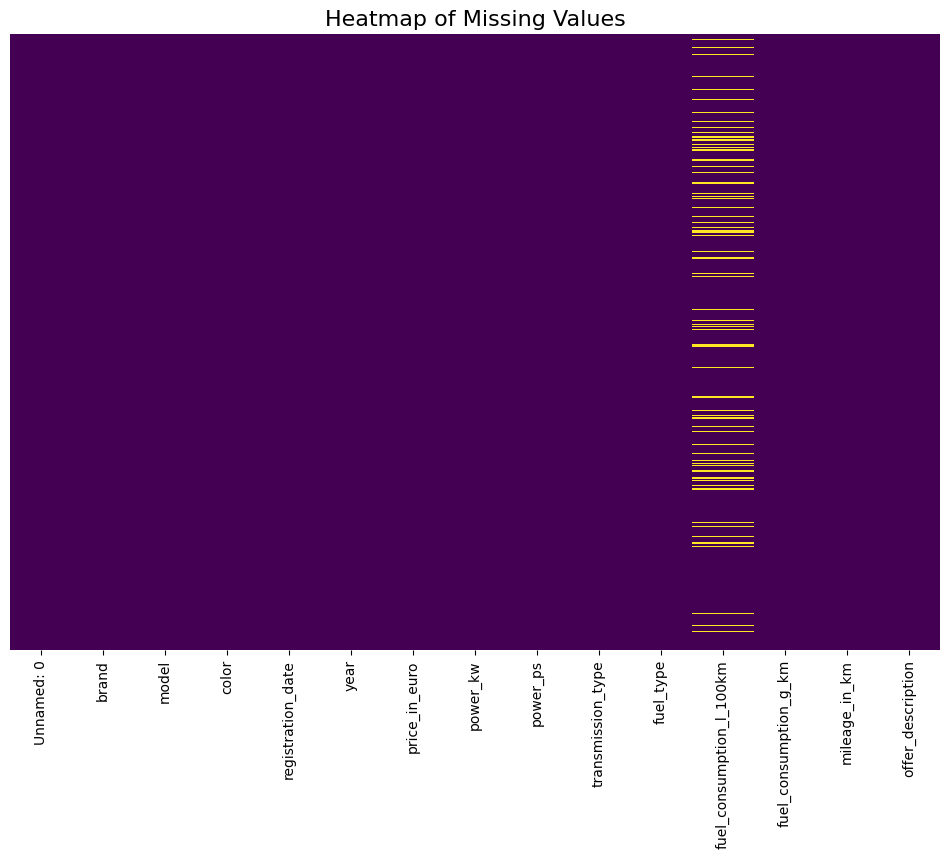

In [ ]:
# Heatmap for Missing Values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values", fontsize=16)
plt.show()


In [ ]:
# Handle missing values
print("\nMissing Values:")
print(data.isnull().sum())
data.dropna(inplace=True)
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0                      0
brand                           0
model                           0
color                         166
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                   0
offer_description               1
registration_year               0
registration_month              0
registration_day                0
car_age                         0
dtype: int64

Missing Values After Handling:
Unnamed: 0                  0
brand                       0
model                       0
color                       0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km  

In [ ]:
# Convert columns to appropriate types
for col in data.select_dtypes(include=['object']):
    try:
        data[col] = data[col].str.replace(r'[^\d.,]', '', regex=True).str.replace(',', '.').astype(float)
    except ValueError:
        pass

In [ ]:
# Parse dates if applicable
if 'registration_date' in data.columns:
    data['registration_date'] = pd.to_datetime(data['registration_date'], errors='coerce')

In [ ]:
# Drop rows where conversion failed
data = data.dropna()

In [ ]:
# Remove outliers using IQR
for col in data.select_dtypes(include=['float64', 'int64']):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

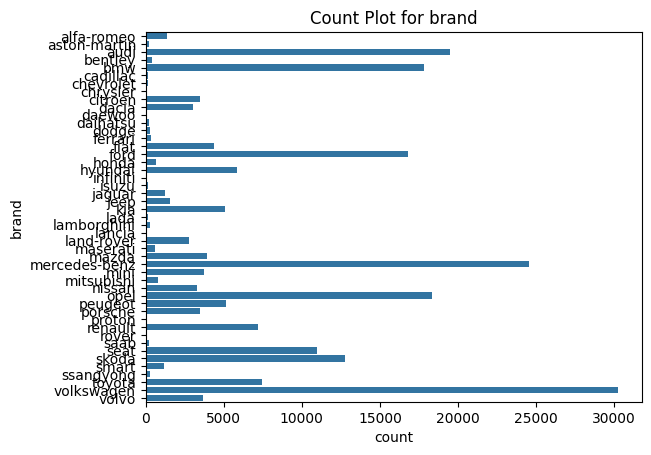

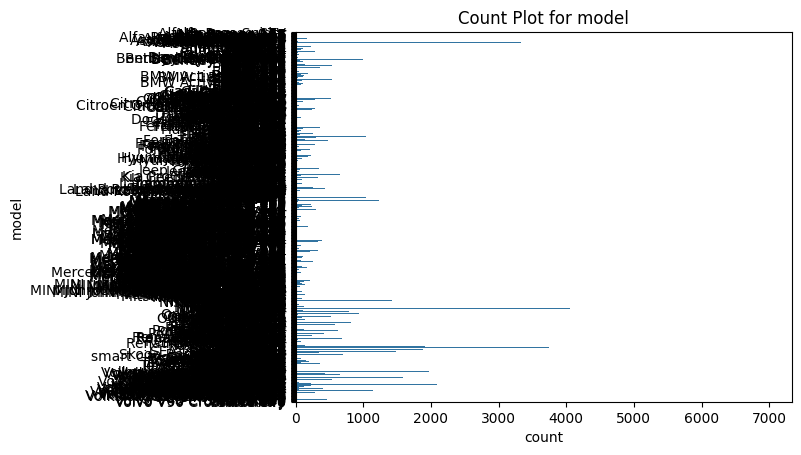

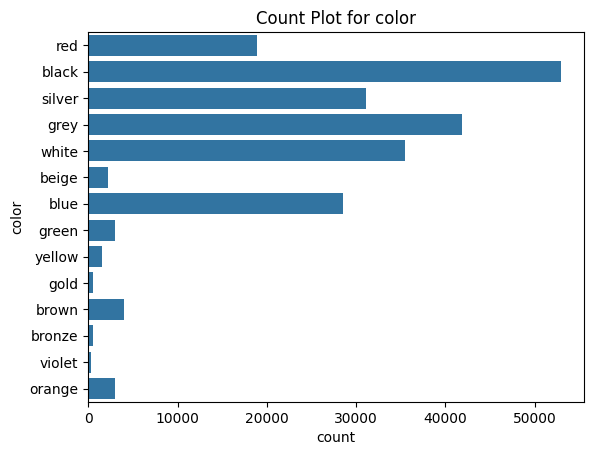

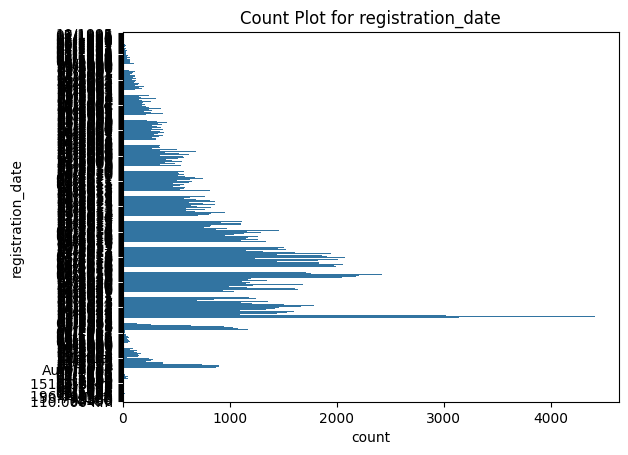

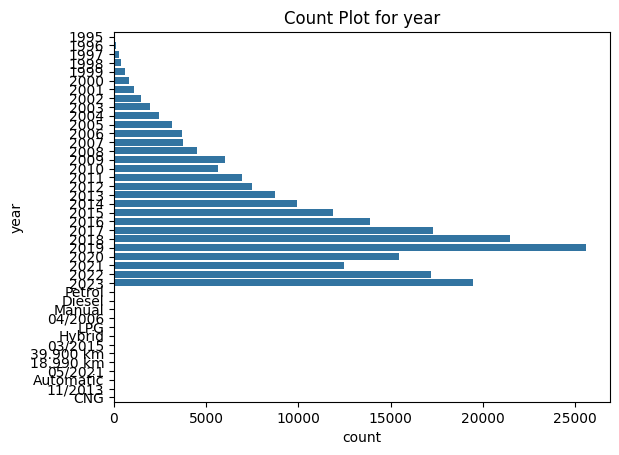

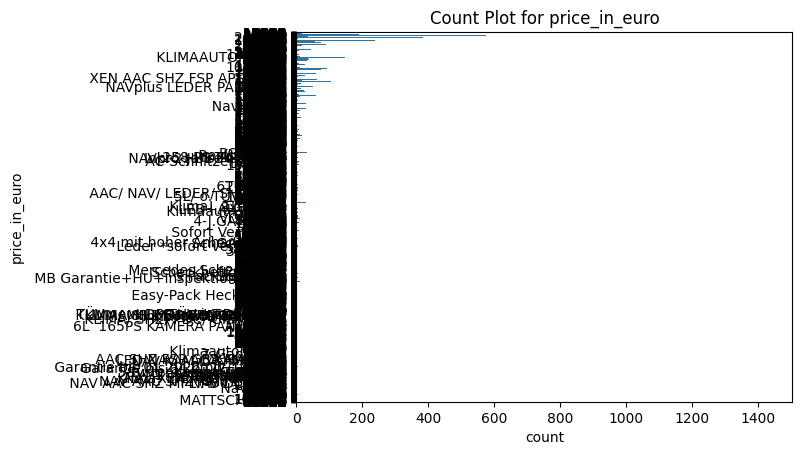

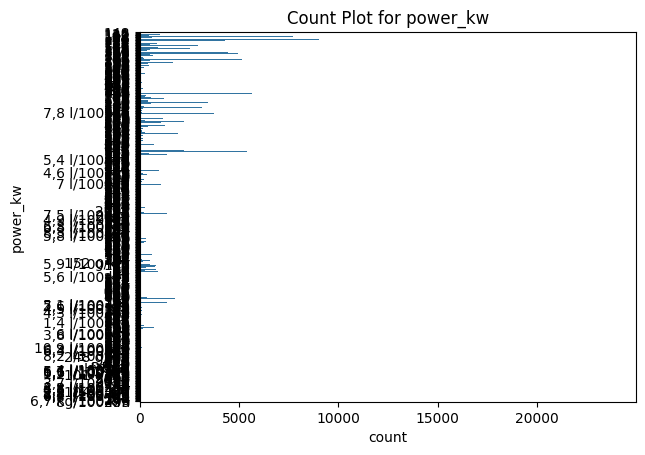

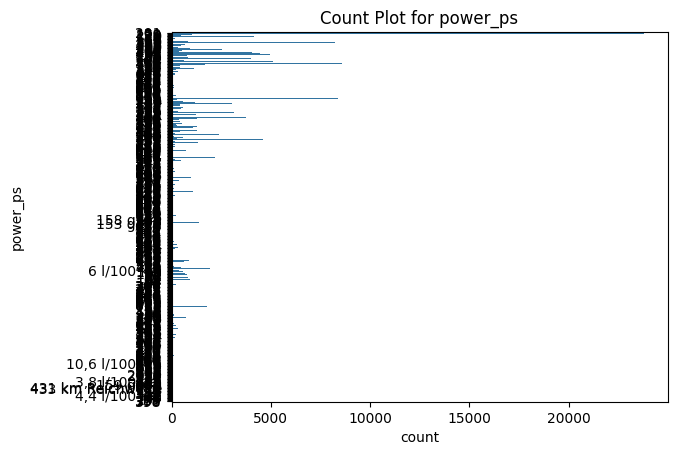

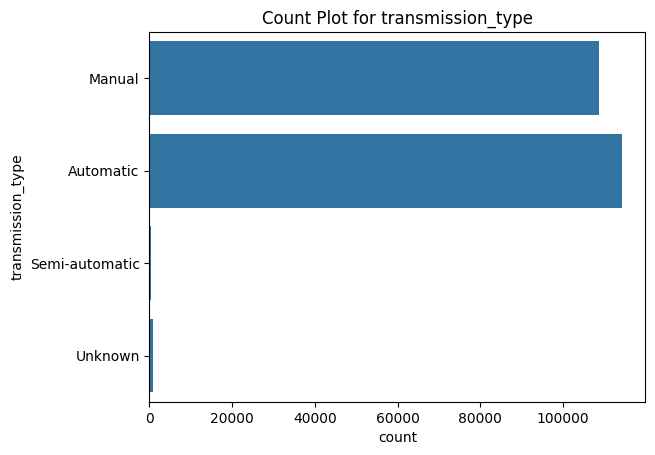

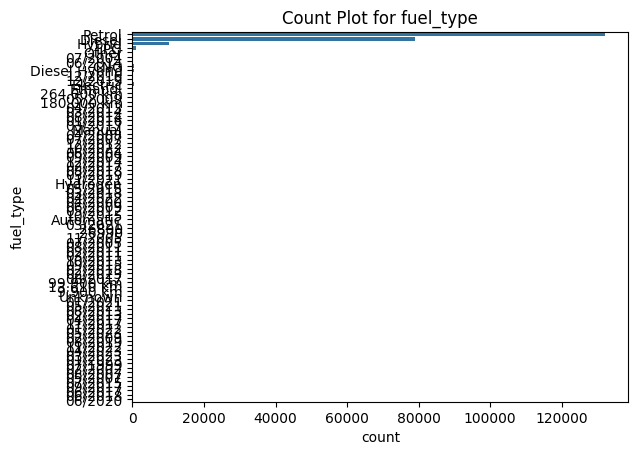

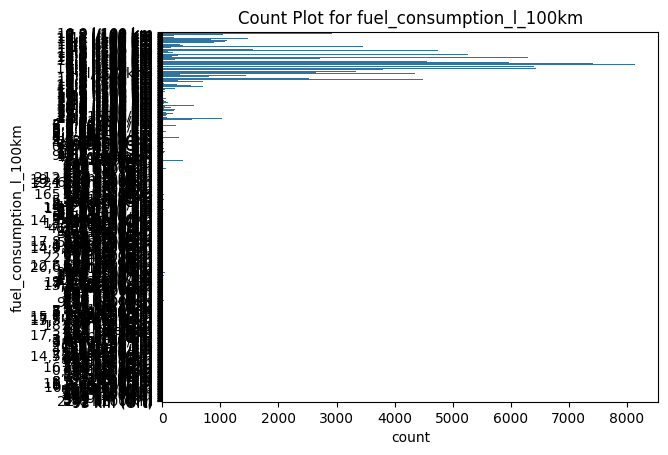

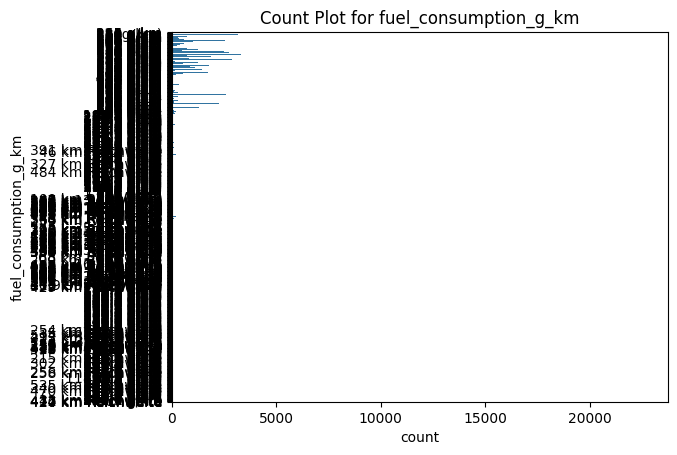

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x782c2035a4d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x782c203591b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Count plots for categorical variables
for col in data.select_dtypes(include=['object']):
    sns.countplot(y=col, data=data)
    plt.title(f"Count Plot for {col}")
    plt.show()


In [ ]:
# Summary statistics
print("\nCleaned Data Summary:")
print(data.describe())


Cleaned Data Summary:
          Unnamed: 0  mileage_in_km  registration_year  registration_month  \
count  211495.000000  211495.000000      211495.000000       211495.000000   
mean   126450.181092   78951.221835        2016.858796            6.255543   
std     72571.866168   65856.011907           4.563246            3.374697   
min       135.000000       0.000000        2005.000000            1.000000   
25%     63759.500000   24420.500000        2014.000000            3.000000   
50%    127142.000000   65560.000000        2018.000000            6.000000   
75%    189020.500000  120000.000000        2020.000000            9.000000   
max    251076.000000  284900.000000        2023.000000           12.000000   

       registration_day        car_age  
count          211495.0  211495.000000  
mean                1.0       7.141204  
std                 0.0       4.563246  
min                 1.0       1.000000  
25%                 1.0       4.000000  
50%                 1.0     

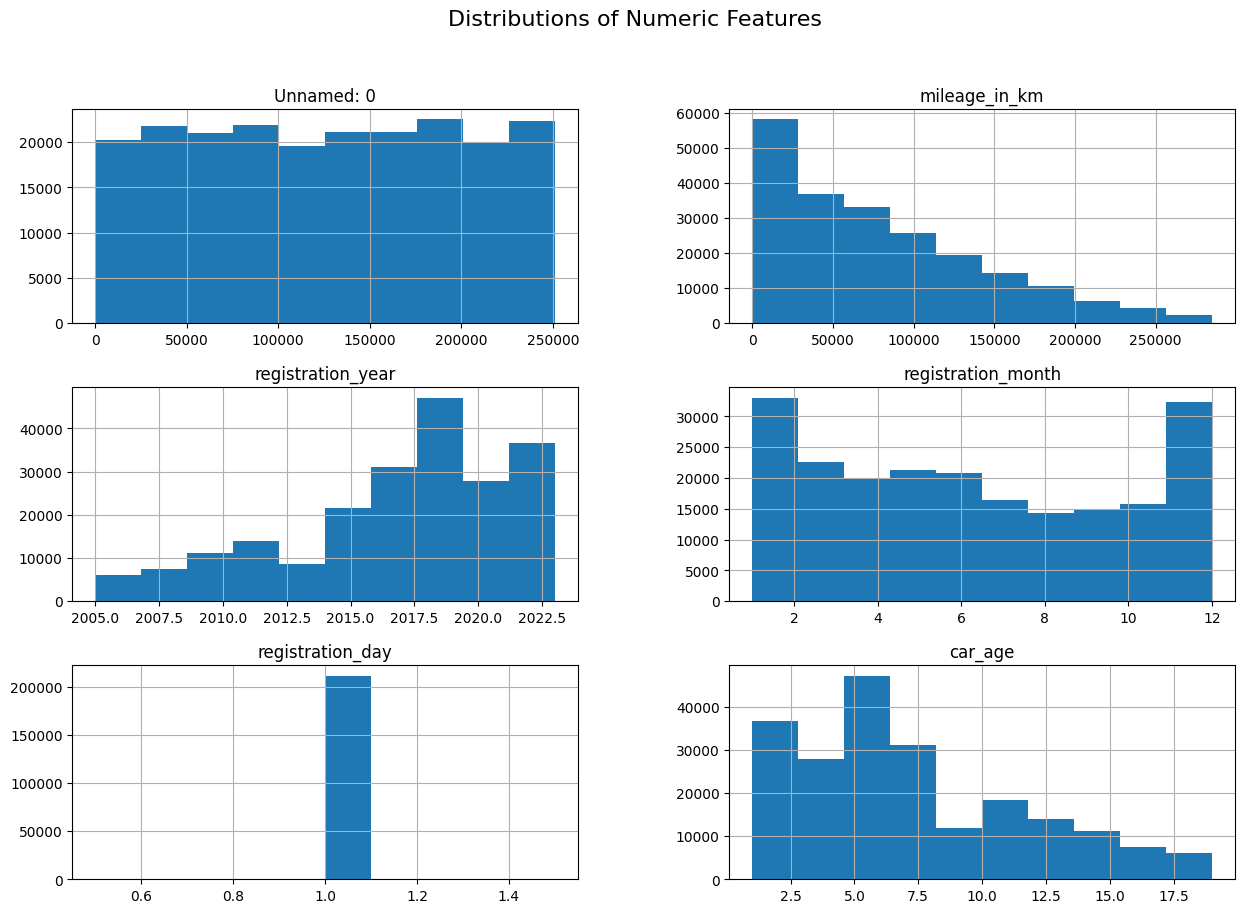

In [ ]:
# Histograms
data.hist(figsize=(15, 10))
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.show()

In [ ]:
# Convert the categorical columns into numeric using one-hot encoding
processed_data = pd.get_dummies(data, drop_first=True)

# Drop unnecessary columns, if they exist
columns_to_drop = ['registration_day', 'Unnamed: 0']
processed_data = processed_data.drop(columns=[col for col in columns_to_drop if col in processed_data.columns])

# Generate the correlation heatmap
plt.figure(figsize=(16, 10))  # Increase size for better visibility
sns.heatmap(processed_data.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap (All Data)", fontsize=16)
plt.show()


NameError: name 'pd' is not defined

In [ ]:
# Encode categorical features
for col in data.select_dtypes(include=['object']):
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
# Scale numeric features
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
# Split dataset into features and target
target_column = 'price_in_euro'  # Replace with your target column name
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

In [ ]:
X = data.drop(target_column, axis=1)
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# K Nearest Neighbour Regressor Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Gradient Booster Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [ ]:
# Random Forest Metrics
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Performance:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2*100:.2f}")


Random Forest Performance:
RMSE: 0.64
R²: 58.86


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# K Nearest neighbour Metrices
knn_rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
knn_r2 = r2_score(y_test, y_pred_knn)
print("\nK Nearest Neighbour Performance:")
print(f"RMSE: {knn_rmse}")
print(f"R²: {knn_r2 * 100: .2f}")


K Nearest Neighbour Performance:
RMSE: 0.7523340295164715
R²:  43.55


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Gradient Boosting Metrices
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
gb_r2 = r2_score(y_test, y_pred_gb)
print("\nGradient Boosting Performance:")
print(f"RMSE: {gb_rmse}")
print(f"R²: {gb_r2 * 100: .2f}")


Gradient Boosting Performance:
RMSE: 0.7890726483842563
R²:  37.90


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


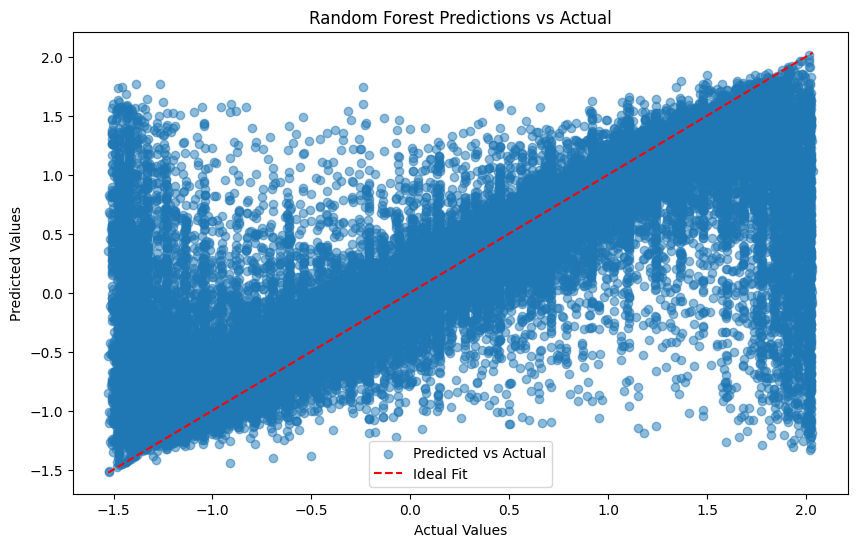

In [ ]:
# Predictions vs Actual Graph for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Predictions vs Actual")
plt.legend()
plt.show()

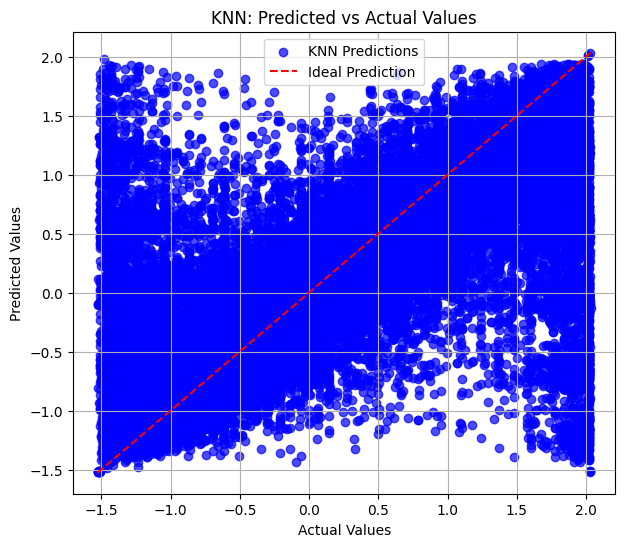

In [ ]:
# Scatter Plot: Predicted vs Actual Values for KNN
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color='blue', label='KNN Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.title("KNN: Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


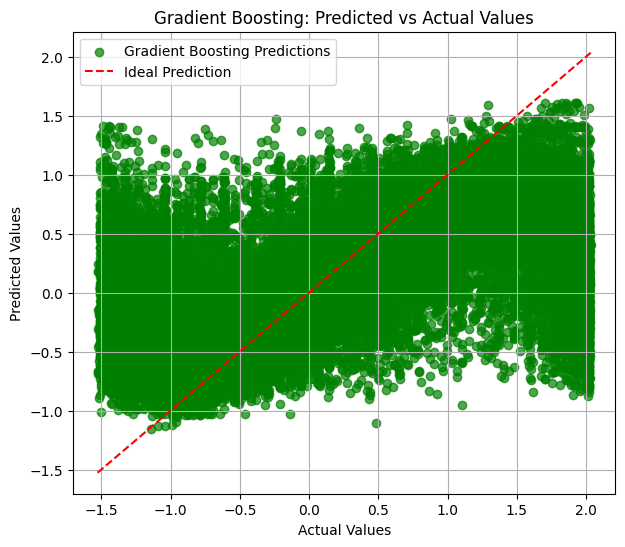

In [ ]:
# Scatter Plot: Predicted vs Actual Values for Gradient Boosting
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='green', label='Gradient Boosting Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.title("Gradient Boosting: Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
''' Deep Learning Models'''

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Architecture
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single neuron for regression output
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict
y_pred_dnn = dnn_model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.6478 - mae: 0.5772 - val_loss: 0.5454 - val_mae: 0.4936
Epoch 2/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.5426 - mae: 0.4918 - val_loss: 0.5269 - val_mae: 0.4682
Epoch 3/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.5109 - mae: 0.4685 - val_loss: 0.5024 - val_mae: 0.4505
Epoch 4/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.5007 - mae: 0.4581 - val_loss: 0.5006 - val_mae: 0.4604
Epoch 5/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.4908 - mae: 0.4517 - val_loss: 0.4910 - val_mae: 0.4488
Epoch 6/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.4863 - mae: 0.4463 - val_loss: 0.4976 - val_mae: 0.4573
Epoch 7/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.4753 - mae: 0.4382 - val_loss: 0.4795 - val_mae: 0.4393
Epoch 8/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.4743 - mae: 0.4376 - val_loss: 0.4863 - val_mae: 0.4462
Epoch 9/50
4230/4230 ━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data for Conv1D input
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Model Architecture
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Single neuron for regression output
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict
y_pred_cnn = cnn_model.predict(X_test_cnn)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.6409 - mae: 0.5745 - val_loss: 0.5482 - val_mae: 0.4861
Epoch 2/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.5299 - mae: 0.4869 - val_loss: 0.5167 - val_mae: 0.4754
Epoch 3/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.5037 - mae: 0.4674 - val_loss: 0.4983 - val_mae: 0.4603
Epoch 4/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.4898 - mae: 0.4567 - val_loss: 0.4858 - val_mae: 0.4465
Epoch 5/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.4744 - mae: 0.4448 - val_loss: 0.4770 - val_mae: 0.4380
Epoch 6/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.4699 - mae: 0.4403 - val_loss: 0.4762 - val_mae: 0.4426
Epoch 7/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.4656 - mae: 0.4378 - val_loss: 0.4905 - val_mae: 0.4505
Epoch 8/50
4230/4230 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.4538 - mae: 0.4307 - val_loss: 0.4739 - val_mae: 0.4440
Epoch 9/50
4230/4230 ━━━━━━━━━━━

In [ ]:
from tensorflow.keras.layers import LSTM

# Reshape data for LSTM input
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model Architecture
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(32, activation='relu'),
    Dense(1)  # Single neuron for regression output
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict
y_pred_lstm = lstm_model.predict(X_test_lstm)


In [ ]:
# Deep Neural Network
rmse_dnn = np.sqrt(mean_squared_error(y_test, y_pred_dnn.flatten()))
r2_dnn = r2_score(y_test, y_pred_dnn.flatten())

print("Deep Neural Network (DNN):")
print(f"RMSE: {rmse_dnn}")
print(f"R²: {r2_dnn}")


In [ ]:
# Convolutional Neural Network
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn.flatten()))
r2_cnn = r2_score(y_test, y_pred_cnn.flatten())

print("Convolutional Neural Network (CNN):")
print(f"RMSE: {rmse_cnn}")
print(f"R²: {r2_cnn}")


In [ ]:
# Long Short-Term Memory
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm.flatten()))
r2_lstm = r2_score(y_test, y_pred_lstm.flatten())

print("Long Short-Term Memory (LSTM):")
print(f"RMSE: {rmse_lstm}")
print(f"R²: {r2_lstm}")
